In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import pandas as pd
import numpy as np
from math import sqrt
import statsmodels.api as sm
import statsmodels
import scipy
from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = [8, 3]


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from src.time_series_helpers import (to_col_vector,
                                 plot_acf_and_pacf,
                                 PolynomialBasisAndDummyizer)
import seaborn as sns
# Always make it pretty.
# plt.style.use('seaborn')

# We get some interger -> float typecast warning from sklean below,
# this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

# from src.to_supervised import series_to_supervised
# from src.plot import plot_per_column_distibution, plot_correlation_matrix, plot_scatter_matrix

In [82]:
path = '../data/PRSA_Data_Aotizhongxin_20130301-20170228.csv'

In [83]:
path = '../data/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv(path, parse_dates = [['year', 'month', 'day', 'hour']],index_col=0, date_parser=parse)
dataset.columns = ['No','PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

dataset.index = pd.to_datetime(dataset.index)

In [9]:
dataset.head(5)
dataset.shape

(35064, 14)

<AxesSubplot:xlabel='year_month_day_hour'>

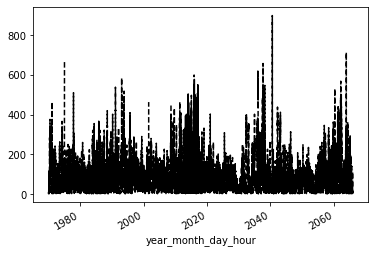

In [8]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = dataset['PM2.5'].rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['PM2.5'].plot(style = 'k--')
r.mean().plot(style = 'k')

In [78]:
data_daily

KeyError: "['2016'] not in index"

<AxesSubplot:xlabel='year_month_day_hour'>

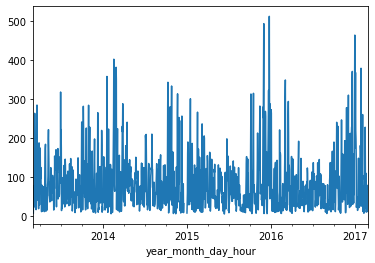

In [80]:
# plot the avg daily PM2.5
data_daily = dataset['PM2.5'].resample('D').mean()
data_daily.columns = 'PM2.5'
data_daily.plot()

In [64]:
data_daily = data_daily.ffill()

<AxesSubplot:xlabel='year_month_day_hour'>

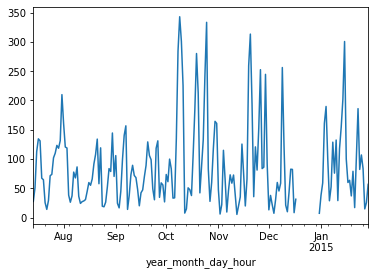

In [43]:
data_daily[500:700].plot()
# seasonal patter, cyclical, maybe a lot of fire at this part of the year

<AxesSubplot:xlabel='year_month_day_hour'>

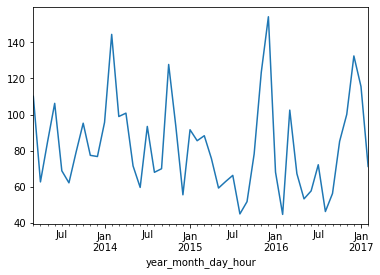

In [16]:
# plot the avg by month PM2.5
data_monthly = dataset['PM2.5'].resample('M').mean()
data_monthly.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

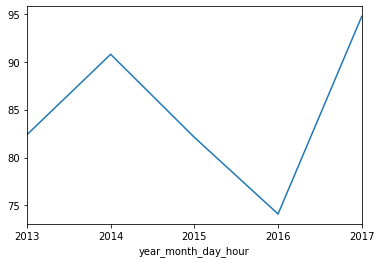

In [17]:
# plot the avg by month PM2.5
data_yearly = dataset['PM2.5'].resample('Y').mean()
data_yearly.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

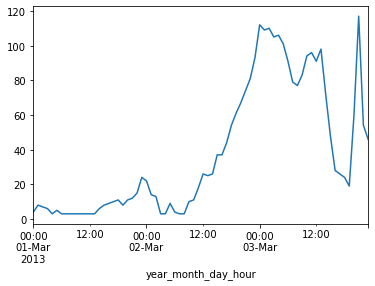

In [22]:
data_hourly_3_days = dataset['PM2.5'][:72]
data_hourly_3_days.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

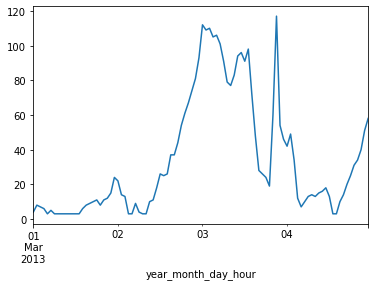

In [23]:
# plot the avg by month PM2.5
data_hourly_first_4_days = dataset['PM2.5'][:97]
data_hourly_first_4_days.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

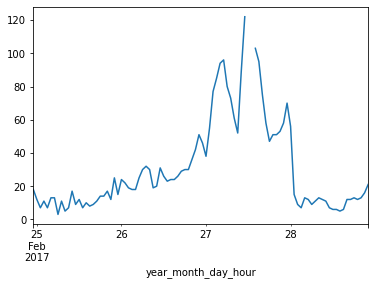

In [24]:
data_hourly_4_days = dataset['PM2.5'][-97:-1]
data_hourly_4_days.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

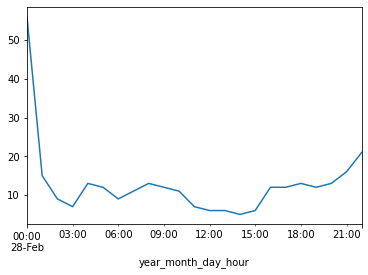

In [27]:
data_hourly = dataset['PM2.5'][-24:-1]
data_hourly.plot()

In [31]:
dataset.resample('H').mean().count()

No       35064
PM2.5    34139
PM10     34346
SO2      34129
NO2      34041
CO       33288
O3       33345
TEMP     35044
PRES     35044
DEWP     35044
RAIN     35044
WSPM     35050
dtype: int64

In [ ]:
# we have seasonallyty 

In [44]:
data_daily.diff()

year_month_day_hour
2013-03-01           NaN
2013-03-02     23.625000
2013-03-03     46.166667
2013-03-04    -54.208333
2013-03-05    126.166667
                 ...    
2017-02-24      4.708333
2017-02-25    -10.333333
2017-02-26     16.916667
2017-02-27     43.829545
2017-02-28    -58.787879
Freq: D, Name: PM2.5, Length: 1461, dtype: float64

In [65]:
#our diff scores should be stationary(means aren't changing and the var aren't changing)
data_daily['data_daily_diff'] = data_daily.diff()

<AxesSubplot:xlabel='year_month_day_hour'>

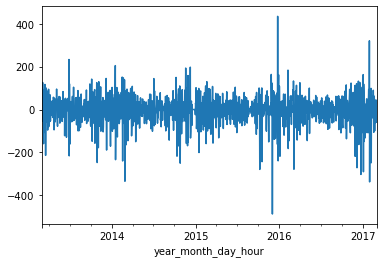

In [66]:
data_daily['data_daily_diff'].plot()

In [47]:
from statsmodels.tsa.stattools import adfuller

In [70]:
results = adfuller(data_daily['data_daily_diff'][1:].values)

In [71]:
results
# rejecting the null p_value 0.00, it's stationary, there is no unit root

(-13.567497152734108,
 2.247922771049759e-25,
 22,
 1437,
 {'1%': -3.434908816804013,
  '5%': -2.863553406963303,
  '10%': -2.5678419239852994},
 15746.510708251737)

In [ ]:
'''
Multiseasonality can't use ARIMA
'''